In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/rohitgupta29/Hackathron_1/master/hackpredict_homestay/Data/Train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/rohitgupta29/Hackathron_1/master/hackpredict_homestay/Data/Test.csv")

train.shape, test.shape

((34226, 16), (14669, 15))

In [3]:
train.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['id']
test_ID = test['id']

train.drop(train.loc[train['availability_365']==0].index, inplace=True)
test.drop(test.loc[test['availability_365']==0].index, inplace=True)


#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (34226, 16) 
The test data size before dropping Id feature is : (14669, 15) 

The train data size after dropping Id feature is : (21969, 15) 
The test data size after dropping Id feature is : (9393, 14) 


## Data Preprocessing

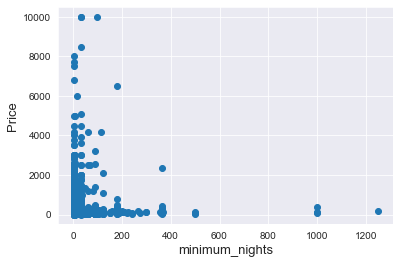

In [5]:
fig, ax = plt.subplots()
ax.scatter(x = train['minimum_nights'], y = train['price'])
plt.ylabel('Price', fontsize = 13)
plt.xlabel('minimum_nights', fontsize = 13)
plt.show()

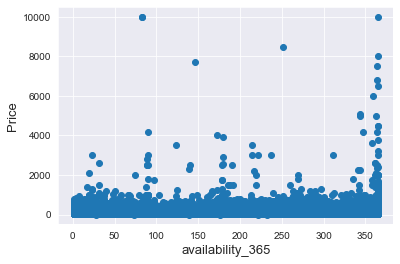

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = train['availability_365'], y = train['price'])
plt.ylabel('Price', fontsize = 13)
plt.xlabel('availability_365', fontsize = 13)
plt.show()

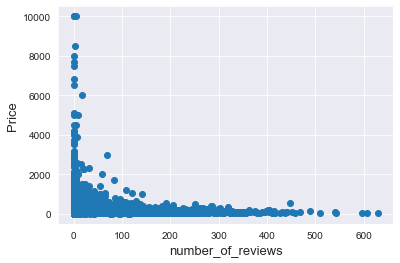

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = train['number_of_reviews'], y = train['price'])
plt.ylabel('Price', fontsize = 13)
plt.xlabel('number_of_reviews', fontsize = 13)
plt.show()

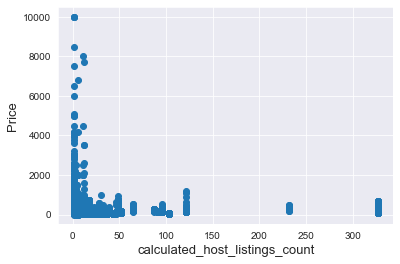

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = train['calculated_host_listings_count'], y = train['price'])
plt.ylabel('Price', fontsize = 13)
plt.xlabel('calculated_host_listings_count', fontsize = 13)
plt.show()

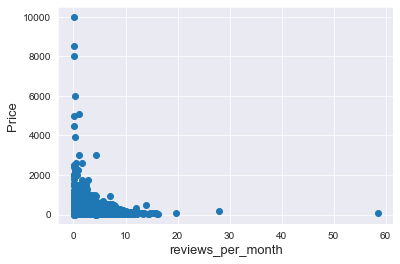

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = train['reviews_per_month'], y = train['price'])
plt.ylabel('Price', fontsize = 13)
plt.xlabel('reviews_per_month', fontsize = 13)
plt.show()

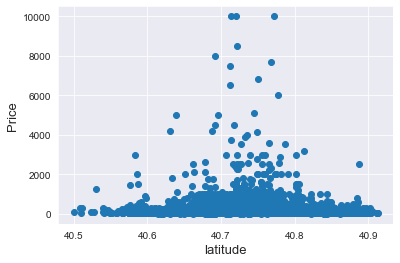

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = train['latitude'], y = train['price'])
plt.ylabel('Price', fontsize = 13)
plt.xlabel('latitude', fontsize = 13)
plt.show()

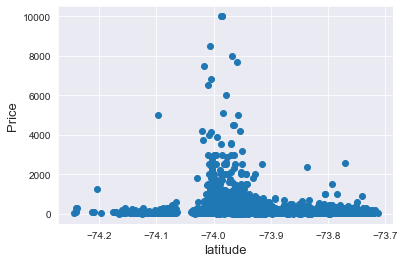

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = train['longitude'], y = train['price'])
plt.ylabel('Price', fontsize = 13)
plt.xlabel('latitude', fontsize = 13)
plt.show()

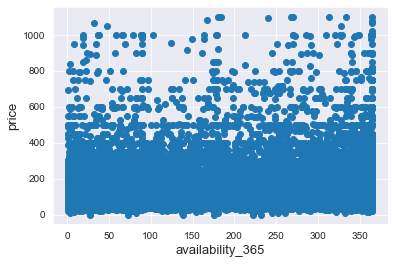

In [12]:
#Deleting outliers
train = train.drop(train[(train['price'] > 1100)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['availability_365'], train['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('availability_365', fontsize=13)
plt.show()


## Target Variable


 mu = 149.89 and sigma = 128.78



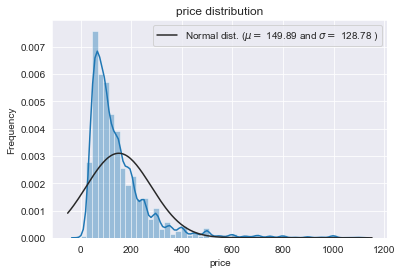

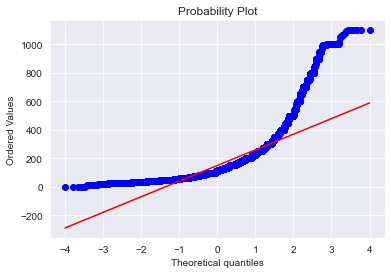

In [13]:
sns.distplot(train['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)
plt.show()

####  The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

#### Log- transformation of the target variable


 mu = 4.76 and sigma = 0.69



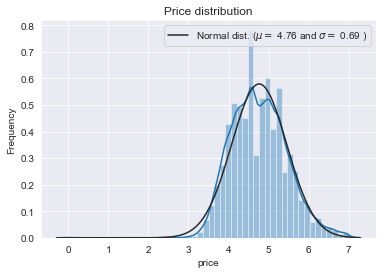

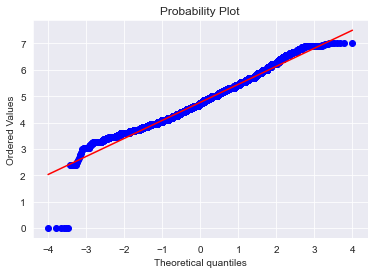

In [14]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["price"] = np.log1p(train["price"])

#Check the new distribution 
sns.distplot(train['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)
plt.show()

#### The skew seems now corrected and the data appears more normally distributed.

### Feature Engineering

### let's first concatenate the train and test data in the same dataframe

In [15]:
ntrain = train.shape[0]
ntest = test.shape[0]
ntrain, ntest

(21858, 9393)

In [16]:
y_train = train.price.values
y_train

array([5.30330491, 3.4339872 , 4.75359019, ..., 4.60517019, 5.14166356,
       4.92725369])

In [17]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['price'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (31251, 14)


### Missing Data

In [18]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
reviews_per_month,16.470
last_review,16.470
host_name,0.026
name,0.013


Text(0.5, 1.0, 'Percent missing data by feature')

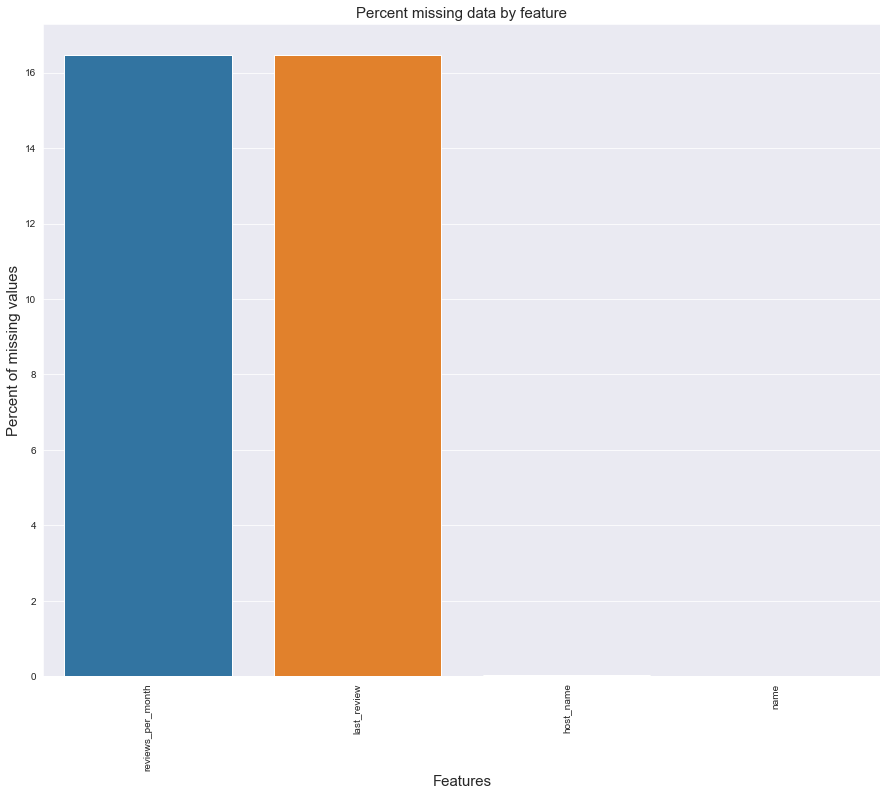

In [19]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Data Correlation

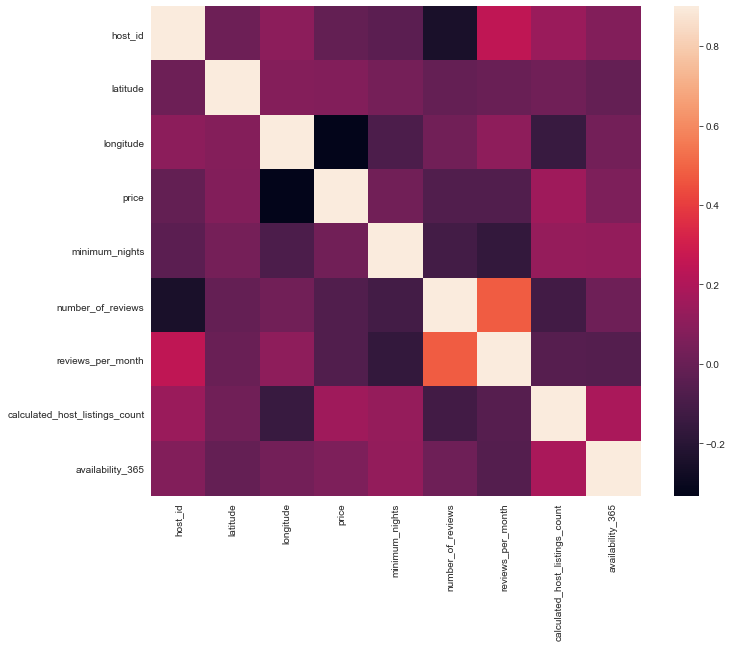

In [20]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

### Imputing the missing Values

In [21]:


all_data    

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.756,-73.893,Entire home/apt,2,4,2019-07-05,4.000,1,365
1,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.601,-74.078,Shared room,2,0,NaN,nan,4,82
2,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.810,-73.943,Shared room,1,16,2019-05-26,0.270,1,365
3,Lower Manhattan Luxury,51105827,Dax,Manhattan,Battery Park City,40.712,-74.016,Entire home/apt,90,1,2016-03-18,0.020,1,362
4,Spacious Clean Studio Apartment,86892032,Marian,Queens,Rosedale,40.658,-73.728,Entire home/apt,1,57,2019-07-08,2.410,1,336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31246,"Stylish, Artsy & Comfortable Stay Near the Ocean.",32215382,Polina,Brooklyn,Sheepshead Bay,40.594,-73.943,Entire home/apt,2,1,2019-05-20,0.590,1,36
31247,New York Moments (Ladies Only),223248121,Julia,Manhattan,Kips Bay,40.743,-73.981,Shared room,2,1,2019-01-01,0.160,1,365
31248,Enjoy Harlem Renassiance Sunny Room,9501531,Andre,Manhattan,Harlem,40.825,-73.945,Private room,1,93,2019-07-02,1.340,3,358
31249,Glamping Van,10407935,Meng,Manhattan,Nolita,40.722,-73.995,Entire home/apt,1,15,2019-05-27,1.120,8,34


In [22]:
all_data["reviews_per_month"] = all_data["reviews_per_month"].fillna(0)

In [23]:
all_data['last_review'] = all_data["last_review"].fillna('NA')

In [24]:
all_data['host_name'] = all_data['host_name'].fillna('NA')

In [25]:
all_data['name'] = all_data['name'].fillna('NA')

In [26]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [27]:
##### There remain no missing value

#### More Feature Engineering

#### Transforming some numerical variables that are really categorical

#### Label Encoding some categorical variables that may contain information in their ordering set

In [28]:
from sklearn.preprocessing import LabelEncoder
cols = ('neighbourhood','neighbourhood_group','host_id','room_type')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (31251, 14)


In [29]:
all_data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,21316,Jenny,3,58,40.756,-73.893,0,2,4,2019-07-05,4.000,1,365
1,Stream-Pressed Paradise (Laundry Room Setup),11757,Rita,4,45,40.601,-74.078,2,2,0,NA,0.000,4,82
2,Charming Harlem apartment,7877,Gina,2,93,40.810,-73.943,2,1,16,2019-05-26,0.270,1,365
3,Lower Manhattan Luxury,12588,Dax,2,6,40.712,-74.016,0,90,1,2016-03-18,0.020,1,362
4,Spacious Clean Studio Apartment,14552,Marian,3,169,40.658,-73.728,0,1,57,2019-07-08,2.410,1,336


In [30]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
minimum_nights,20.510
calculated_host_listings_count,6.312
number_of_reviews,3.035
reviews_per_month,2.941
longitude,1.143
room_type,0.486
neighbourhood_group,0.317
neighbourhood,0.286
latitude,0.184
availability_365,0.128


### Box Cox Transformation of (highly) skewed features

#### We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .

- Note that setting  λ=0  is equivalent to log1p used above for the target variable.

In [31]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 11 skewed numerical features to Box Cox transform


In [32]:
all_data = all_data.drop(['host_name','latitude','longitude','last_review','reviews_per_month','name','minimum_nights','availability_365','calculated_host_listings_count','host_id'], axis = 'columns')
all_data

,neighbourhood_group,neighbourhood,room_type,number_of_reviews
0,1.541,5.623,0.000,1.820
1,1.820,5.173,1.194,0.000
2,1.194,6.512,1.194,3.530
3,1.194,2.260,0.000,0.730
4,1.541,7.737,0.000,5.591
...,...,...,...,...
31246,0.730,7.787,0.000,0.730
31247,1.194,6.863,1.194,0.730
31248,1.194,6.512,0.730,6.512
31249,1.194,7.383,0.000,3.438


In [33]:
# all_data_1 = pd.get_dummies(all_data)
# print(all_data_1.shape)


In [34]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# Modelling

### Import Libraries

In [35]:
train.shape,test.shape

((21858, 4), (9393, 4))

In [36]:
y_train.shape

(21858,)

In [37]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

### Define a cross validation strategy

#### We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation

In [38]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    print(rmse)
    return(rmse)

### Base Models

####  LASSO Regression
  - This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [39]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

#### Elastic Net Regression :
- again made robust to outliers

In [40]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[0.51630365 0.51518118 0.5163243  0.52640668 0.51151976]

Lasso score: 0.5171 (0.0050)



In [41]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#### Kernel Ridge Regression :

In [42]:
##KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#### Gradient Boosting Regression :
- With huber loss that makes it robust to outliers

In [43]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

#### XGBoost :

In [44]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

#### LightGBM :

In [45]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#### Base models scores

- Let's see how these base models perform on the data by evaluating the cross-validation rmsle error

In [46]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[0.51630365 0.51518118 0.5163243  0.52640668 0.51151976]

Lasso score: 0.5171 (0.0050)



In [47]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[0.51630394 0.5151818  0.51632444 0.52640613 0.51151798]
ElasticNet score: 0.5171 (0.0050)



In [48]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

NameError: name 'KRR' is not defined

In [49]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[0.4603198  0.46059826 0.45645157 0.46280525 0.45584248]
Gradient Boosting score: 0.4592 (0.0026)



In [50]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[20:00:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:01:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:01:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [51]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

## Stacking models

- Simplest Stacking approach : Averaging base models
    
- We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse (inheritance)

#### Averaged Base Models Class

In [52]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

#### Averaged base models score

- We just average four models here ENet, GBoost, KRR and lasso. Of course we could easily add more models in the mix.

In [53]:
averaged_models = AveragingModels(models = (ENet, GBoost, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[0.48312804 0.48220774 0.4818505  0.49048003 0.47777593]
 Averaged base models score: 0.4831 (0.0041)



### Stacking over Models Class

In [54]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

#### Stacking Averaged models Score

- To make the two approaches comparable (by using the same number of models) , we just average Enet KRR and Gboost, then we add lasso as meta-model.

In [66]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

[0.44977359 0.4516865  0.44464621 0.45972168 0.44854485]
Stacking Averaged models score: 0.4509 (0.0050)


## Ensembling StackedRegressor, XGBoost and LightGBM

- We add XGBoost and LightGBM to the StackedRegressor defined previously.

In [68]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### StackedRegressor

In [69]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.43689830843918537


## XGBoost

In [70]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

[16:48:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.45167489589403303


## LightGBM:

In [71]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
0.46183411530438856


In [72]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.4401998318784314


## Ensemble Prediction

In [73]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15
ensemble

NameError: name 'stacked_pred' is not defined

In [74]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

NameError: name 'ensemble' is not defined